# **Domain Knowledge**

The Diamonds dataset contains 50,000+ samples of various diamond rings, and
various features associated with them:

      ▪ Price – The price of the diamond ring in $USD (US Dollars).
      ▪ Carat – The weight of a given diamond ring.
      ▪ Cut – The quality of cut.
      ▪ Colour – The colour of the stone, ranked from J (worst) to D (best)
      ▪ Clarity – A measurement of how clear the diamond stone is (I1 (worst),
      IF (best)
      ▪ X, Y & Z – The respective length, width and depth of the diamond stone
      in millimetres (mm).
      ▪ Depth – A calculation of depth percentage: 𝑑𝑒𝑝𝑡ℎ_𝑝𝑒𝑟𝑐𝑒𝑛𝑡 = 2𝑧/(𝑥 +
      𝑦)
      ▪ Table – The width of the top of the diamond relative to its widest point.


In [79]:
# importing necessary libraries
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Pre-Processing

In [80]:
# Read the CSV file into a DataFrame
url = "https://raw.githubusercontent.com/Another-Curious-Mind/Data-Science/main/diamonds.csv"
diamonds_df = pd.read_csv(url)

# Display the first few rows of the dataset to get an initial view
diamonds_df.head(5)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [81]:
diamonds_df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [82]:
diamonds_df.shape

(53940, 11)

In [83]:
# Count null values in each column
diamonds_df.isnull().values.sum()

0

In [84]:
# Exploring the data types of columns
diamonds_df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [85]:
# Investigating the distribution of categorical variables:
print(diamonds_df['cut'].value_counts())
print(diamonds_df['color'].value_counts())
print(diamonds_df['clarity'].value_counts())

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


Statistical Analysis

In [86]:
#T-Test for Mean Comparison:


# Define two groups for the t-test
group1 = diamonds_df[diamonds_df['cut'] == 'Ideal']['price']
group2 = diamonds_df[diamonds_df['cut'] == 'Premium']['price']

# Perform the t-test
t_stat, p_value = ttest_ind(group1, group2)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average prices.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average prices.")


T-statistic: -25.650910588183198
P-value: 8.585274269295433e-144
Reject the null hypothesis: There is a significant difference in the average prices.


In [87]:
# Chi-Square Test of Independence:


# Create a contingency table
contingency_table = pd.crosstab(diamonds_df['cut'], diamonds_df['color'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: 'cut' and 'color' are dependent.")
else:
    print("Fail to reject the null hypothesis: 'cut' and 'color' are independent.")


Chi-Square Statistic: 310.31790052115434
P-value: 1.394512091985105e-51
Reject the null hypothesis: 'cut' and 'color' are dependent.


In [88]:
# Pearson Correlation Test:


# Calculate the correlation coefficient and p-value
correlation_coeff, p_value = pearsonr(diamonds_df['carat'], diamonds_df['price'])

# Print the results
print("Correlation Coefficient:", correlation_coeff)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a linear correlation between carat and price.")
else:
    print("Fail to reject the null hypothesis: There is no linear correlation between carat and price.")


Correlation Coefficient: 0.9215913011934771
P-value: 0.0
Reject the null hypothesis: There is a linear correlation between carat and price.


 Data Visualisation

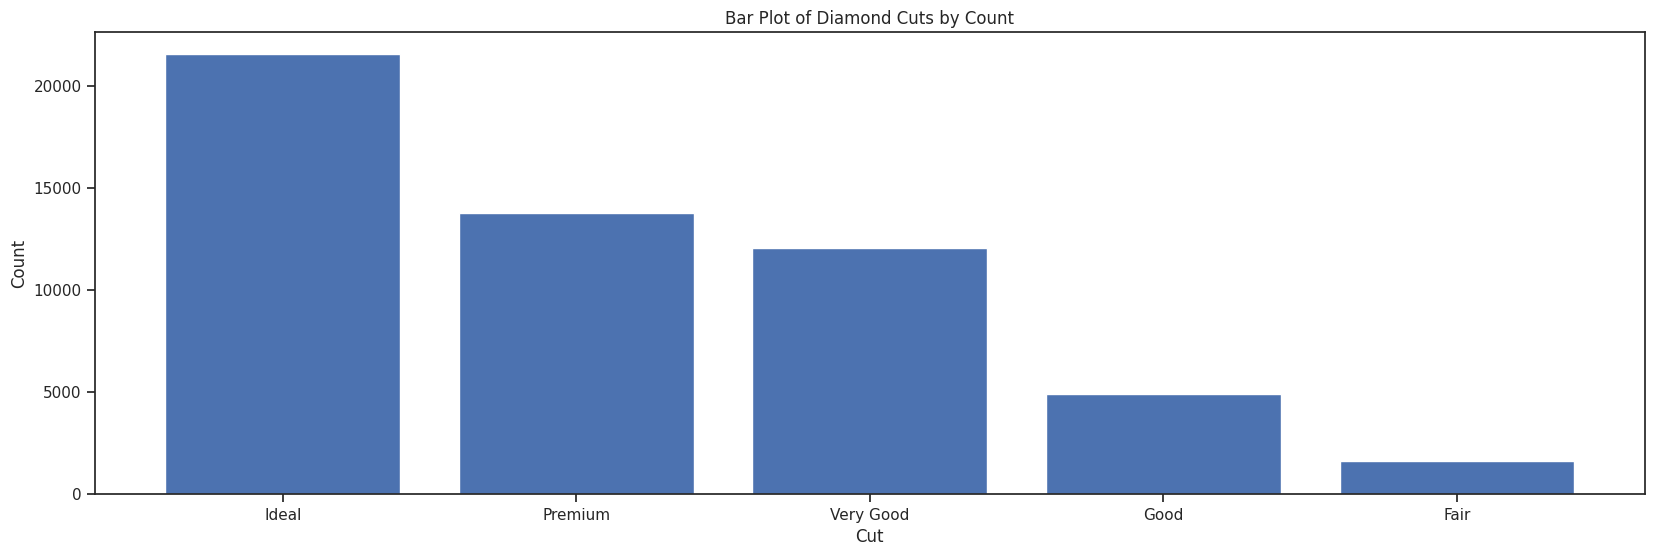

In [89]:
# Create a bar plot for the count of each diamond cut
cut_counts = diamonds_df['cut'].value_counts()
plt.figure(figsize=(20, 6))
plt.bar(cut_counts.index, cut_counts.values)

plt.xlabel("Cut")
plt.ylabel("Count")
plt.title("Bar Plot of Diamond Cuts by Count")
plt.show()


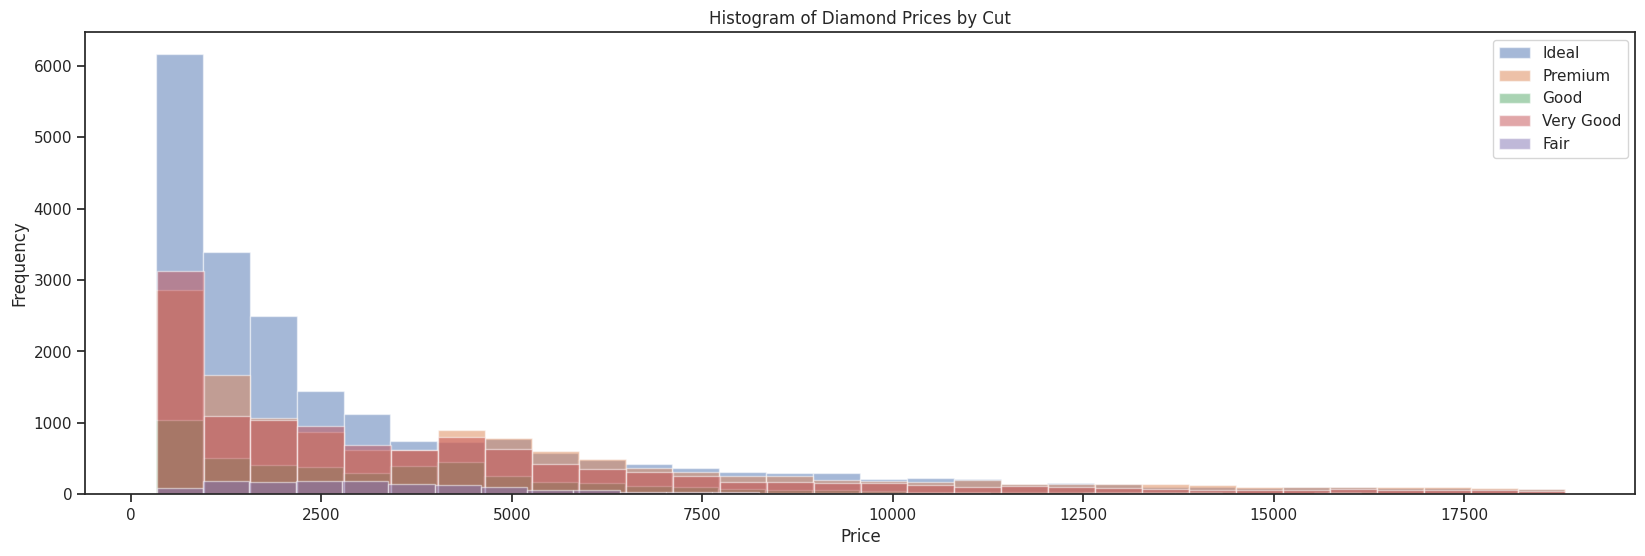

In [90]:
# Creating histogram for diamond prices by cut
plt.figure(figsize=(20, 6))
for cut in diamonds_df['cut'].unique():
    plt.hist(diamonds_df[diamonds_df['cut'] == cut]['price'], bins=30, alpha=0.5, label=cut)

plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Diamond Prices by Cut")
plt.legend()
plt.show()


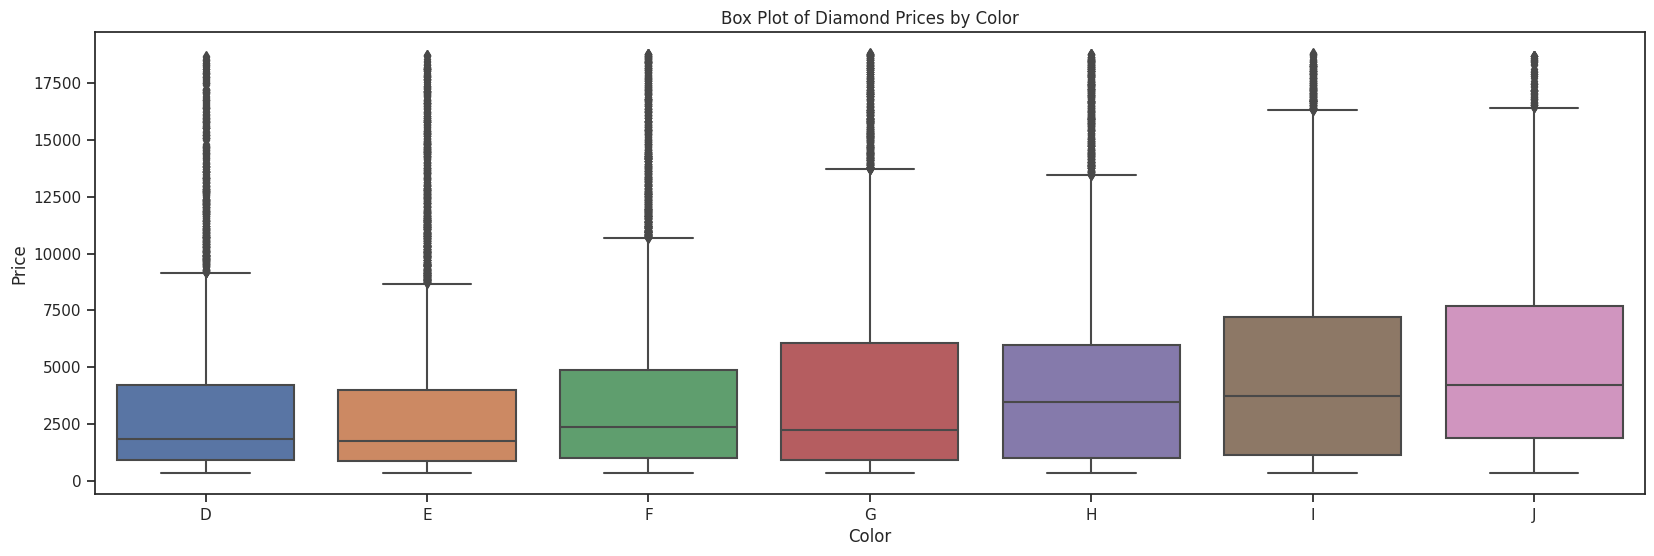

In [91]:
# Creating box plot for diamond prices by color
plt.figure(figsize=(20, 6))
sns.boxplot(data=diamonds_df, x='color', y='price', order=sorted(diamonds_df['color'].unique()))

plt.xlabel("Color")
plt.ylabel("Price")
plt.title("Box Plot of Diamond Prices by Color")
plt.show()


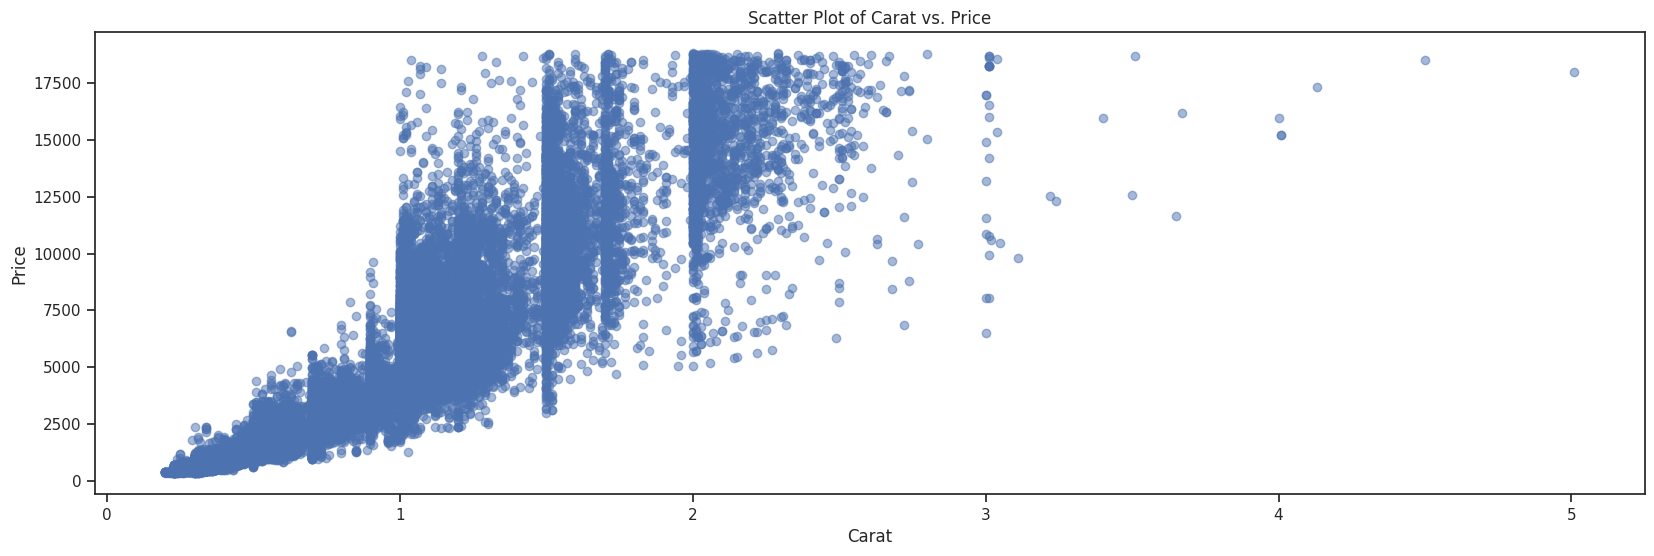

In [92]:
# Creating Scatter Plot of Carat vs. Price
plt.figure(figsize=(20, 6))
plt.scatter(diamonds_df['carat'], diamonds_df['price'], alpha=0.5)

plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Scatter Plot of Carat vs. Price")
plt.show()


<Figure size 1200x800 with 0 Axes>

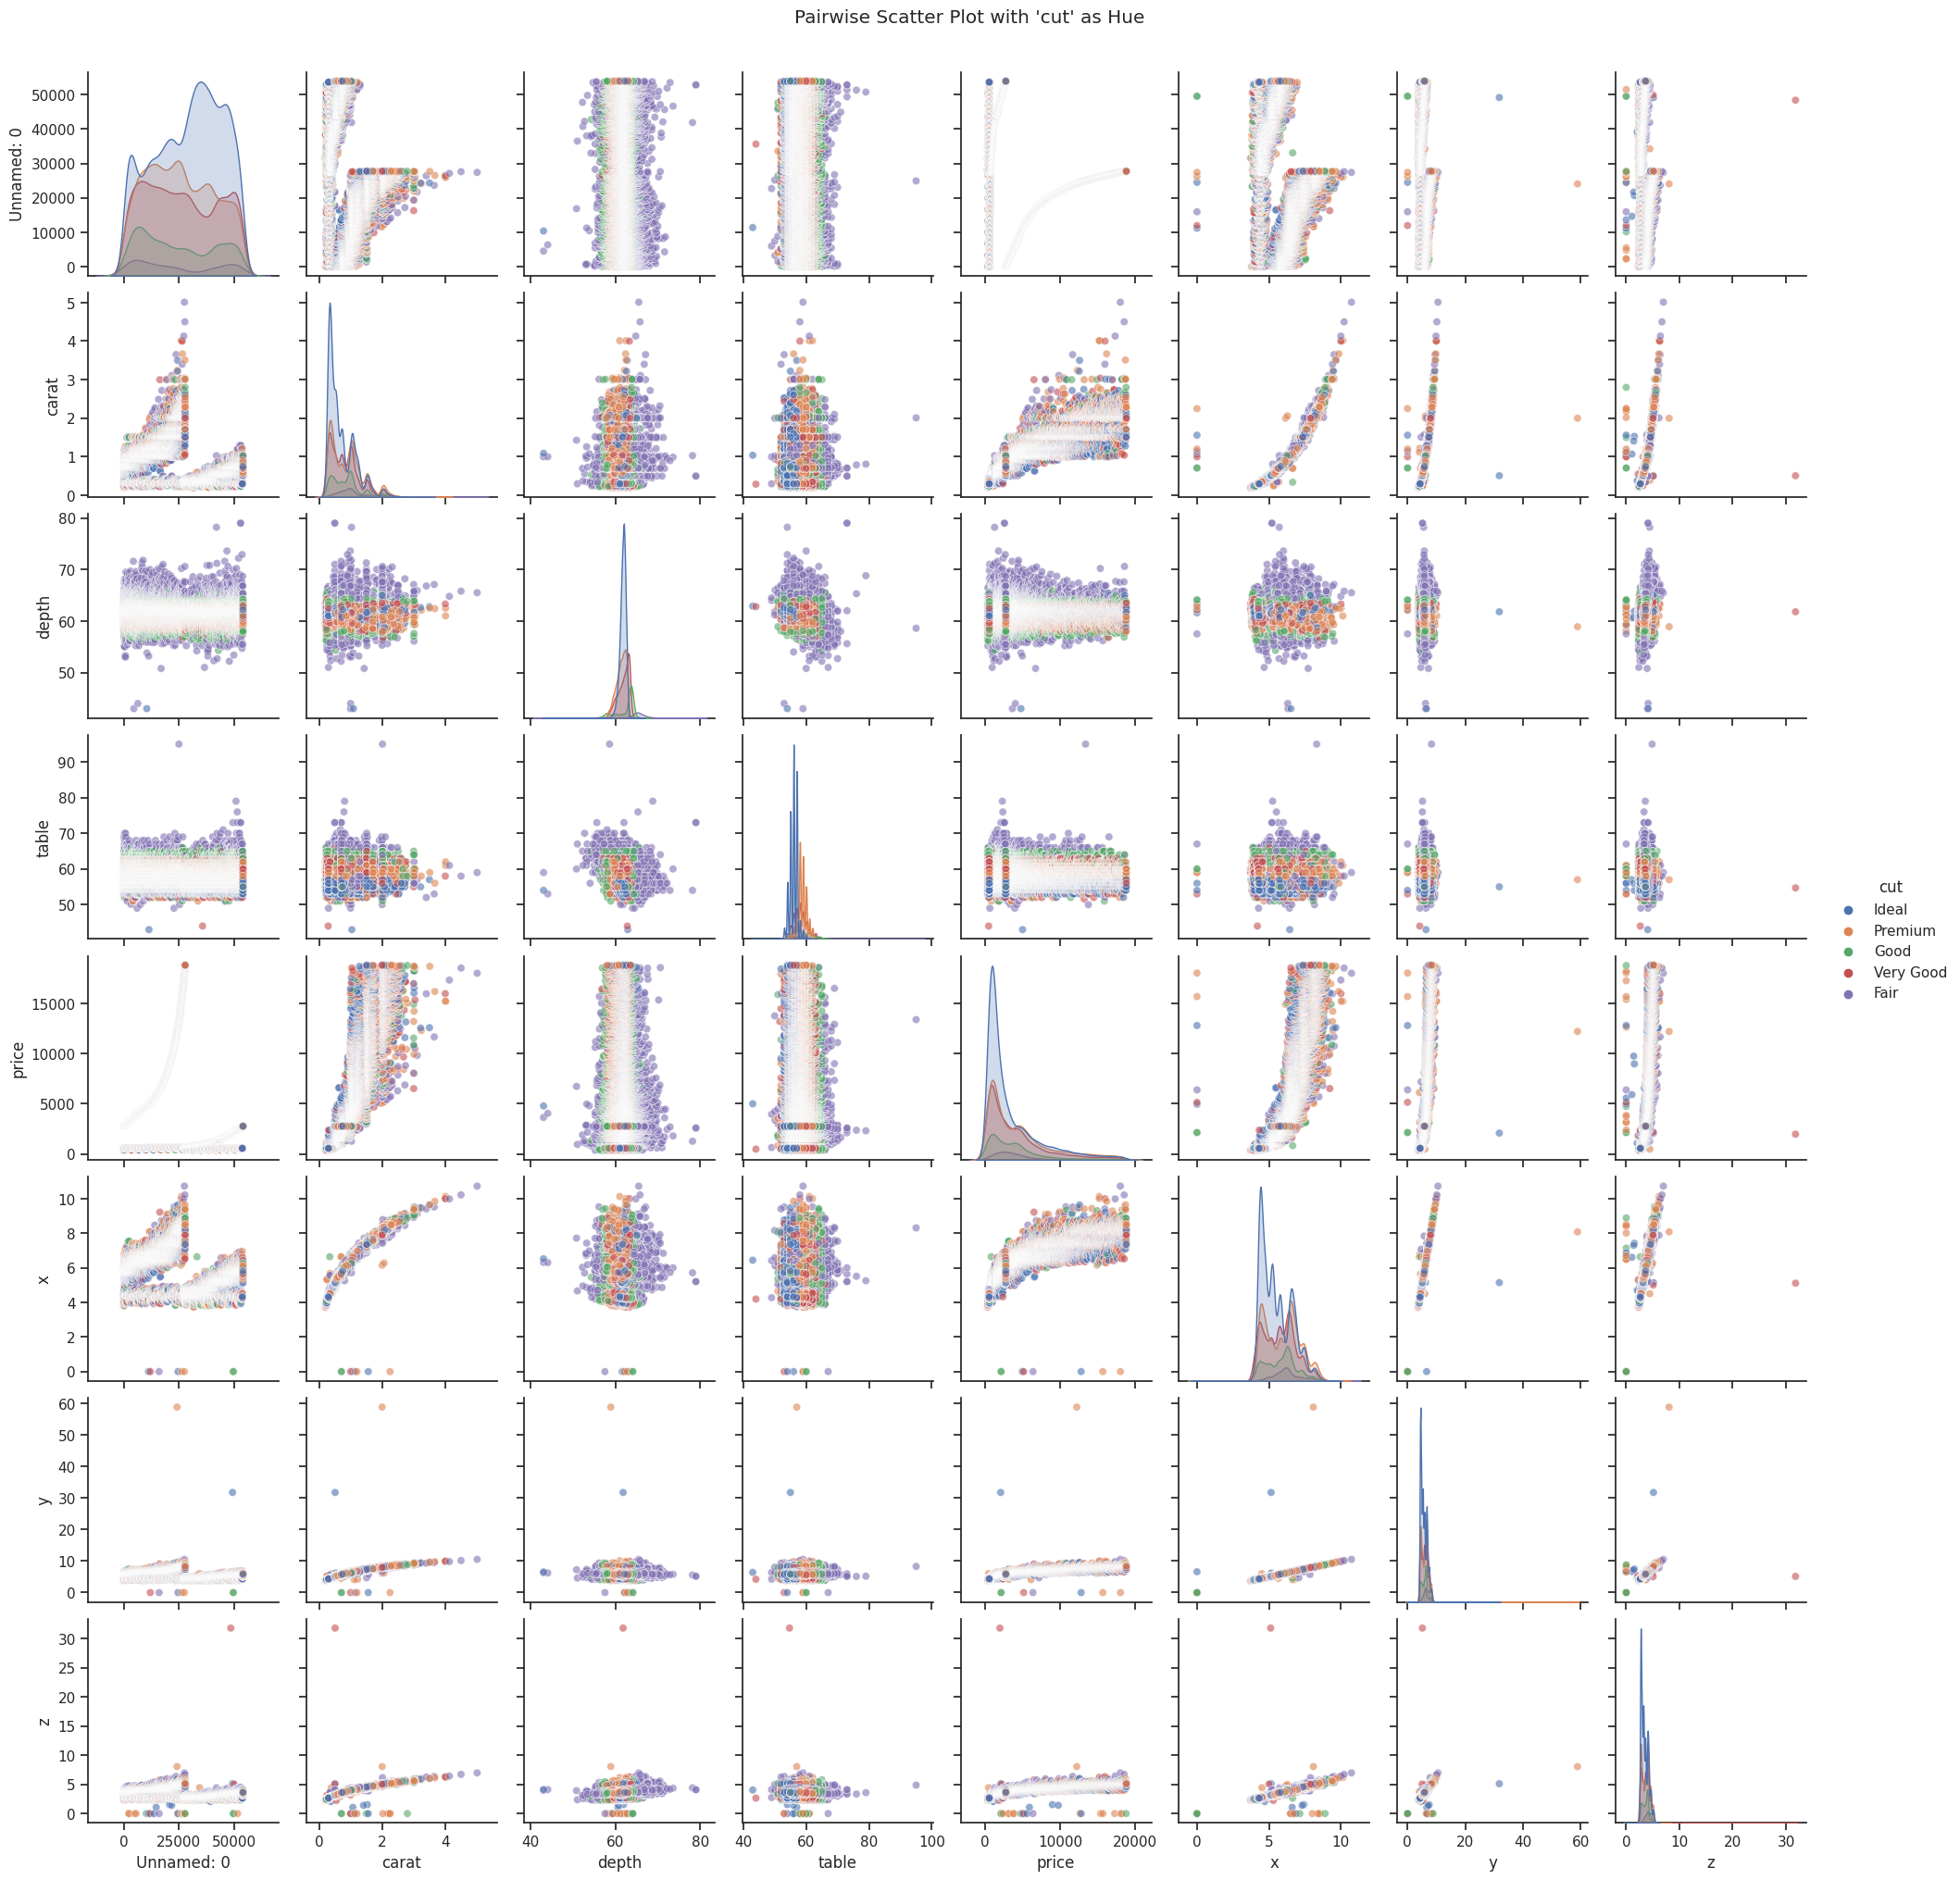

In [93]:
# Create a pair plot with 'cut' as the hue
plt.figure(figsize=(12, 8))
sns.pairplot(diamonds_df, hue='cut', plot_kws={'alpha': 0.6})

plt.suptitle("Pairwise Scatter Plot with 'cut' as Hue", y=1.02)
plt.show()


 Linear Regression

In [94]:
# Selectign relevant features (independent variables)
X = diamonds_df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]

# Encoding categorical features
X = pd.get_dummies(X, drop_first=True)

# Target variable (dependent variable)
y = diamonds_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error: 1276624.46
R-squared (R2) Score: 0.92


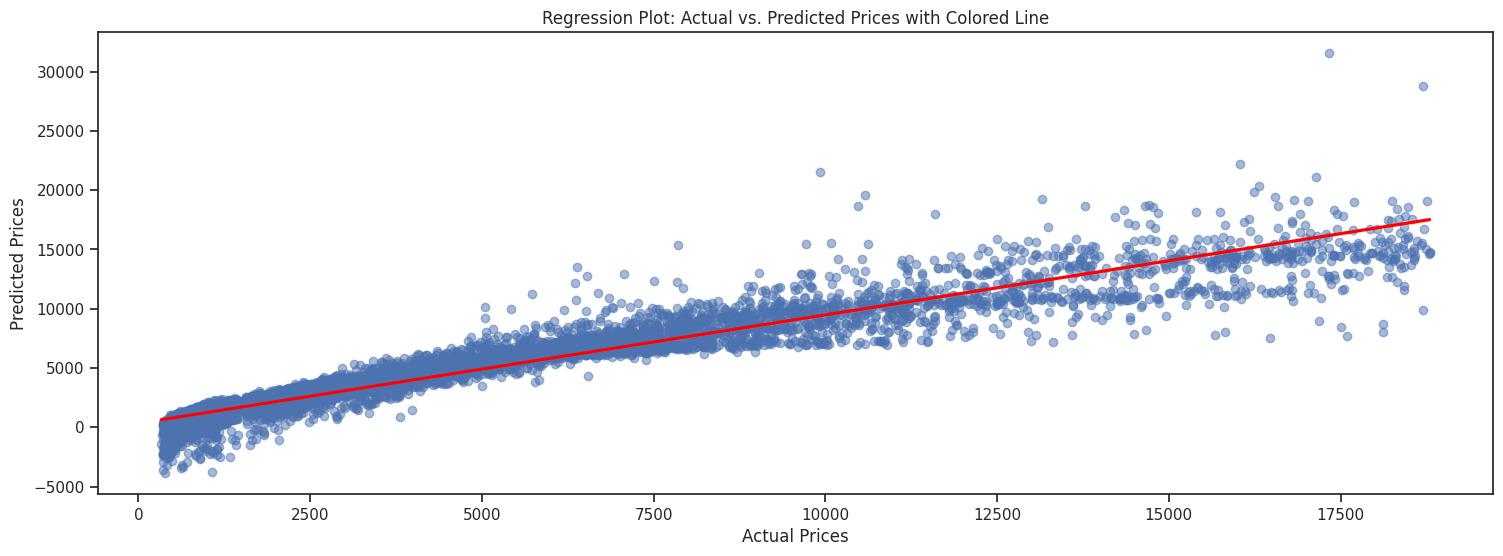

In [95]:
plt.figure(figsize=(18, 6))

# Creating a regplot with a colored regression line
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Regression Plot: Actual vs. Predicted Prices with Colored Line")
plt.show()

# **Key findings from the Exploratory Data Analysis (EDA:)**



*   The dataset contains no missing values.
*   It comprises 53,940 rows and 11 columns, providing a comprehensive sample for analysis.
*   The carat weight of the diamonds in the dataset ranges from 0.20 to 5.01 carats.
*   Diamond prices range from a minimum of 326 USD to a maximum of 18,823 USD.
*   A significant difference in average prices exists among different 'cut' categories.
*   The 'cut' of a diamond significantly impacts its pricing.
*   The dataset analysis reveals a dependency between 'cut' and 'color' attributes.
*   A linear correlation is observed between the carat weight and the price of diamonds.
*   Diamonds with an ideal cut are the most common in the dataset.
*   Ideal cut diamonds are the most expensive, followed by premium, good, very good, and fair cuts.
*   Outliers are present in the Box Plot of Diamond Prices by Color for each color category.
*   The most expensive diamonds in the dataset are those with colorless grade (D), followed by near-colorless (E), faint yellow (F), very light yellow (G), and so on.
*   Positive correlations are noted between carat weight, cut grade, and clarity grade with diamond prices.
*   Carat weight exhibits a strong positive correlation with price.
*   A negative correlation is observed between depth and diamond prices.
*   The multiple linear regression model exhibits a high coefficient of determination (R-squared) of approximately 0.92, indicating that the model can explain around 92% of the variance in the target variable (diamond price).

*   The regression model is considered a good fit for the data, as it effectively captures and explains the relationships between the features and the diamond prices.